In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [5]:
# ================== Load Dataset ==================
df = pd.read_excel(r"C:\Users\91954\Downloads\House_Data\House _Prediction.xlsx")

In [7]:
 # Show dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [8]:
# ================== Dataset Info ==================
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
None


In [10]:
# ================== Features & Target ==================
X = df.drop("Price", axis=1)   # Input features
y = df["Price"]                # Target column

In [11]:
# ================== Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# ================== Model Training ==================
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Location"] = le.fit_transform(df["Location"])

In [18]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
print("\nAfter Encoding Columns:")
print(df.head())



After Encoding Columns:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location   Price  \
0   1  1360         5          4       3       1970         0  149919   
1   2  4272         5          4       3       1958         0  424998   
2   3  3592         2          2       3       1938         0  266746   
3   4   966         4          2       2       1902         2  244020   
4   5  4926         1          4       2       1975         0  636056   

   Condition_Fair  Condition_Good  Condition_Poor  Garage_Yes  
0           False           False           False       False  
1           False           False           False       False  
2           False            True           False       False  
3            True           False           False        True  
4            True           False           False        True  


In [21]:
# ================== Features & Target ==================
X = df.drop("Price", axis=1)
y = df["Price"]

In [22]:
# ================== Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# ================== Model Training ==================
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# ================== Prediction ==================
y_pred = model.predict(X_test)

# ================== Model Evaluation ==================
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [25]:
print("\nModel Performance:")
print("R2 Score:", r2)
print("Mean Squared Error:", mse)



Model Performance:
R2 Score: -0.011895235351328637
Mean Squared Error: 78724263895.20123


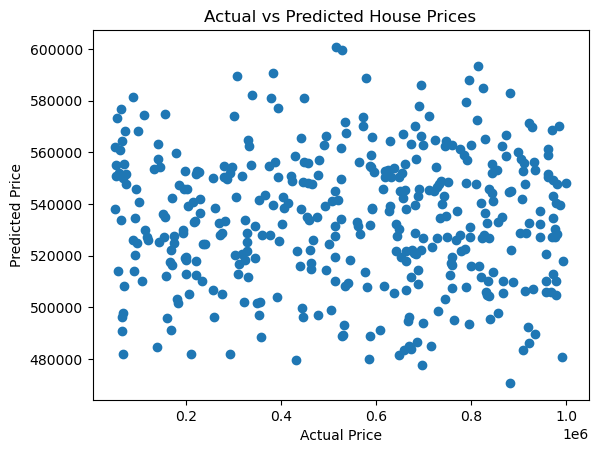

In [26]:
# ================== Visualization ==================
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [27]:
# ================== New House Price Prediction ==================
# IMPORTANT: New input must match encoded columns count
new_house = X.columns.to_frame().T  # dummy structure
new_house.loc[0] = 0  # fill zeros

In [28]:
# Example values (change according to your dataset)
if "area" in X.columns: new_house["area"] = 1500
if "bedrooms" in X.columns: new_house["bedrooms"] = 3
if "bathrooms" in X.columns: new_house["bathrooms"] = 2

In [29]:
predicted_price = model.predict(new_house)
print("\nPredicted House Price:", predicted_price[0])


Predicted House Price: 294247.2021373955
